In [1]:
import pandas as pd
import numpy as np
import calculate_cleavage_rate as clv
%matplotlib inline 
import matplotlib.pylab as plt
import seaborn as sns
sns.set_style('ticks')
current_colors = sns.color_palette()
reload(clv)
import sys
import create_fake_data as cr
reload(cr)
sys.path.append('../code_general_Finkelsteinlab')
import plotting_Finkelsteinlab as pltData
reload(pltData);

model_ID = 'Clv_init_limit_Saturated_general_energies_v2'
times = [0.0,12.0,60.0,180.0,600.0,1800.0,6000.0,18000.0,60000.0]
guide = 20

path_data = '../data_nucleaseq_Finkelsteinlab/targetE/'
filename_data = 'ECas9_cleavage_rate_and_y0_Canonical_OT-r_0-2.csv'

### Show result of fit

In [33]:
filename = 'fit_28_2_2019_sim_37.txt'
path = '28_2_2019/run4/'
data = pd.read_table(path+filename,index_col=False)
final_par = data.loc[len(data)-1,'Parameter 1':'Parameter 43']
final_par_np = final_par.values
chi = data.loc[:,'Potential']
data.tail()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,...,Parameter 36,Parameter 37,Parameter 38,Parameter 39,Parameter 40,Parameter 41,Parameter 42,Parameter 43,Potential,Equilibruim
1529,2.493698,-2.290064,-3.748758,-2.173087,0.201507,5.903602,-4.935542,1.416171,-0.334733,5.991423,...,4.711741,3.456382,2.693420,3.864482,6.153712,0.983698,2.782617,0.118420,3.532606,True
1530,2.494736,-2.290797,-3.748384,-2.173059,0.201429,5.903880,-4.935349,1.415337,-0.334954,5.992564,...,4.710695,3.455936,2.692904,3.863766,6.154488,0.983908,2.782755,0.119005,3.534651,False
1531,2.494554,-2.291909,-3.748513,-2.172917,0.201662,5.903477,-4.934766,1.414890,-0.334175,5.993319,...,4.711417,3.456013,2.692769,3.864359,6.153644,0.985143,2.783008,0.119420,3.532181,True
1532,2.494727,-2.291659,-3.747857,-2.173459,0.201118,5.903782,-4.934905,1.414368,-0.332918,5.993422,...,4.710694,3.456560,2.693477,3.864935,6.153659,0.985631,2.782939,0.119468,3.529008,True
1533,2.493957,-2.290833,-3.748755,-2.172905,0.201054,5.904059,-4.936439,1.414416,-0.332291,5.993241,...,4.710350,3.456765,2.692940,3.864993,6.153707,0.986601,2.782963,0.119153,3.537184,True


Text(0.5,1,'difference in parameters squared')

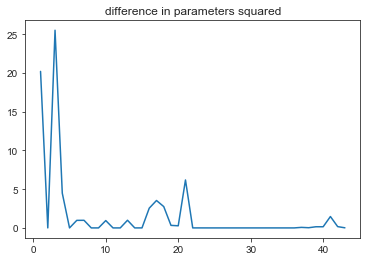

In [34]:
parameters = np.loadtxt('example-params-2.txt')
difference_sqrd = (parameters-final_par_np)**2
plt.figure
plt.plot(range(1,44),difference_sqrd)
plt.title('difference in parameters squared')

## Single mismatches

(array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00]),
 <a list of 7 Text yticklabel objects>)

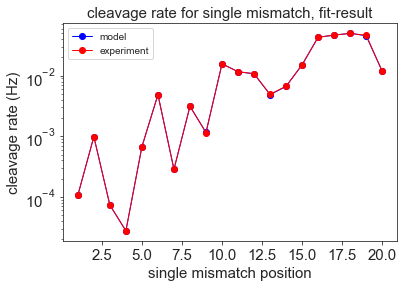

In [35]:
data_exp = pd.read_csv(path_data + filename_data)
k_exp_pd = pltData.plot_single_mut_data(data_exp, 'cleavage_rate', 'r', Canonical=True, data_name='cleavage rate (Hz)', Plot=False, 
                                                    logplot=False, SaveFigures=False)
k_exp = k_exp_pd.values[:,1]

_, k_fake, _ = cr.create_fake_data()
k_fake = k_fake[1:21]

k = np.zeros(20)
for i in range(1,guide+1):
    mismatch = [i]
    k[i-1] = clv.calc_clv_rate_fast(final_par_np,model_ID,mismatch,guide)
    
plt.figure
plt.semilogy(range(1,21),k, marker='o', linewidth=1, color='blue')
plt.semilogy(range(1,21),k_fake, marker='o', linewidth=1, color='red')
plt.xlabel('single mismatch position', fontsize=15)
plt.ylabel('cleavage rate (Hz)', fontsize=15)
plt.title('cleavage rate for single mismatch, fit-result', fontsize=15)
plt.legend(['model','experiment'])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

## Double mismatches

Text(0.5,1,'double mismatches, top=model bottom=experiment')

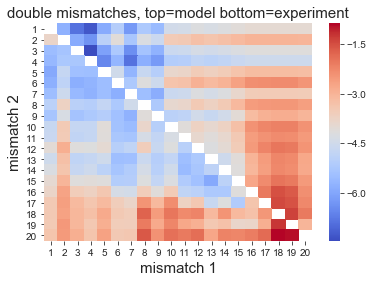

In [21]:
data_exp = pd.read_csv(path_data + filename_data)
_, k_matrix_exp = pltData.plot_double_mut_data(data_exp, 'cleavage_rate', 'r', Canonical=True, Ng=20, data_name='cleavage rate (Hz)', Plot=False, logplot=True,
                        SaveFigures=False, figure_name='./Figure.pdf')
k_matrix_exp.fillna(0, inplace=True)

k_matrix = np.zeros([20,20])

for i in range(1,20):
    for j in range(i+1,21):
        mismatch_positions = [i,j]
        k_matrix[i-1,j-1] = np.log10(clv.calc_clv_rate_fast(final_par_np,model_ID,mismatch_positions,guide))
        
k_df = pd.DataFrame(k_matrix, index=range(1, 21), columns=range(1, 21))
combined_df = k_df + k_matrix_exp

for i in range(1,21):
    combined_df[i].loc[i]=np.nan

sns.heatmap(combined_df, cmap='coolwarm', cbar=True)
plt.xlabel('mismatch 1', fontsize=15)
plt.ylabel('mismatch 2', fontsize=15)
plt.title('double mismatches, top=model bottom=experiment', fontsize=15)


## Chi squared evolution

(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.,
         60000.,  70000.,  80000.]), <a list of 10 Text yticklabel objects>)

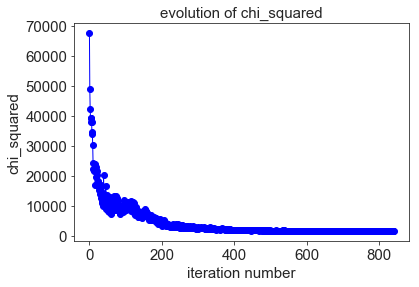

In [31]:
plt.plot(chi, marker='o', linewidth=1, color='blue')
plt.xlabel('iteration number', fontsize=15)
plt.ylabel('chi_squared', fontsize=15)
plt.title('evolution of chi_squared', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)